<a href="https://colab.research.google.com/github/UjjwalaVayuvegula/ujjwala_Batch115/blob/main/Customer%20Retention%20DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Required Libraries



In [5]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings

In [6]:
warnings.filterwarnings("ignore")

# Working on Train Data

# Importing the data and merging 

In [7]:
customerdata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Customerdata_Train.xlsx")

In [8]:
customerdata

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday
23816,C12197,CITY3,2018-01-17,1,0,1,Friday
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday


In [9]:
emaildata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Emaildata_Train.xlsx")
emaildata.columns=['CustomerID','Dateofemail','EmailType','timestamp_of_sent','MailOpened','MailClicked']

In [10]:
emaildata

,CustomerID,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable
...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no


In [11]:
emaildata.duplicated().sum()

0

In [12]:
merge1=pd.merge(customerdata,emaildata,how='inner')

In [13]:
merge1

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
517667,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,16:17:16,no,no
517668,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517669,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no
517670,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes


In [14]:
transaction_data=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/transactionsdata_Train.xlsx")
transaction_data.columns=['CustomerID','DateofOrder','timestamp_of_opening','OrderQuantity']

In [15]:
transaction_data


,CustomerID,DateofOrder,timestamp_of_opening,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81
...,...,...,...,...
104750,C12197,2018-01-17,14:35:40,56
104751,C40967,2018-01-17,17:15:20,35
104752,C36140,2018-01-17,13:12:54,47
104753,C36140,2018-01-21,21:12:52,53


In [16]:
transaction_data.dtypes

CustomerID              object
DateofOrder             object
timestamp_of_opening    object
OrderQuantity            int64
dtype: object

In [17]:
merge2=pd.merge(merge1,transaction_data,how='inner')

In [18]:
merge2

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2013-08-11,15:17:52,15
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013-08-11,15:17:52,15
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013-08-11,15:17:52,15
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,2013-08-11,15:17:52,15
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013-08-11,15:17:52,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018-01-17,13:12:54,47
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018-01-21,21:12:52,53
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,2018-01-17,13:12:54,47
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,2018-01-21,21:12:52,53


In [19]:
train_xls=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Train.xlsx")

In [20]:
train_xls

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High
...,...,...
23815,C14975,Low
23816,C30392,Low
23817,C41735,Low
23818,C26055,Low


In [21]:
data1=pd.merge(merge2,train_xls,how='inner')
data1

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2013-08-11,15:17:52,15,High
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013-08-11,15:17:52,15,High
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013-08-11,15:17:52,15,High
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,2013-08-11,15:17:52,15,High
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013-08-11,15:17:52,15,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018-01-17,13:12:54,47,Low
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018-01-21,21:12:52,53,Low
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,2018-01-17,13:12:54,47,Low
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,2018-01-21,21:12:52,53,Low


# Preprocessing

In [22]:
registered_dates=customerdata[['CustomerID','DateOfRegistration']]
pd.DataFrame(registered_dates)
registered_dates

,CustomerID,DateOfRegistration
0,C16368,2012-09-28
1,C20345,2010-12-19
2,C17683,2010-10-03
3,C18647,2010-11-27
4,C36692,2009-12-04
...,...,...
23815,C23511,2018-01-17
23816,C12197,2018-01-17
23817,C40967,2018-01-17
23818,C36140,2018-01-17


In [23]:
data1['DateofOrder'] = pd.to_datetime(data1['DateofOrder'])

In [24]:
first_order_dates = data1.groupby('CustomerID')['DateofOrder'].min()
pd.DataFrame(first_order_dates)
first_order_dates = first_order_dates.reset_index()
first_order_dates = first_order_dates.rename(columns={'index': 'CustomerID'})
first_order_dates

,CustomerID,DateofOrder
0,C12116,2013-10-03
1,C12117,2013-12-05
2,C12118,2013-09-10
3,C12119,2013-10-22
4,C12120,2014-01-10
...,...,...
23815,C42185,2011-04-04
23816,C42186,2013-11-23
23817,C42187,2013-09-15
23818,C42188,2011-10-04


In [25]:
diff=pd.merge(registered_dates,first_order_dates,how='inner')
diff

,CustomerID,DateOfRegistration,DateofOrder
0,C16368,2012-09-28,2013-08-11
1,C20345,2010-12-19,2011-04-01
2,C17683,2010-10-03,2010-12-01
3,C18647,2010-11-27,2010-11-29
4,C36692,2009-12-04,2011-09-21
...,...,...,...
23815,C23511,2018-01-17,2018-01-17
23816,C12197,2018-01-17,2018-01-17
23817,C40967,2018-01-17,2018-01-17
23818,C36140,2018-01-17,2018-01-17


In [26]:
diff['diffR&F']=(diff['DateofOrder']- diff['DateOfRegistration']).dt.days
diff

,CustomerID,DateOfRegistration,DateofOrder,diffR&F
0,C16368,2012-09-28,2013-08-11,317
1,C20345,2010-12-19,2011-04-01,103
2,C17683,2010-10-03,2010-12-01,59
3,C18647,2010-11-27,2010-11-29,2
4,C36692,2009-12-04,2011-09-21,656
...,...,...,...,...
23815,C23511,2018-01-17,2018-01-17,0
23816,C12197,2018-01-17,2018-01-17,0
23817,C40967,2018-01-17,2018-01-17,0
23818,C36140,2018-01-17,2018-01-17,0


In [27]:
data1.duplicated().sum()

0

In [28]:
data1.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
Dateofemail             0
EmailType               0
timestamp_of_sent       0
MailOpened              0
MailClicked             0
DateofOrder             0
timestamp_of_opening    0
OrderQuantity           0
RetentionPotential      0
dtype: int64

In [29]:
data1['datetime_str1'] = data1['Dateofemail'] + ' ' + data1['timestamp_of_sent']

In [30]:
# convert the concatenated string to a datetime object
data1['datetimeofsent'] = pd.to_datetime(data1['datetime_str1'], format='%Y-%m-%d %H:%M:%S')
data2=data1.drop(['Dateofemail','timestamp_of_sent','datetime_str1'],axis=1)

data2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential,datetimeofsent
0,C16368,CITY2,2012-09-28,0,0,0,Monday,WelcomeEmail,yes,NotApplicable,2013-08-11,15:17:52,15,High,2012-09-28 15:56:50
1,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,2013-05-20 15:10:30
2,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,2013-02-05 13:54:22
3,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,2012-11-26 11:22:32
4,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,2013-05-30 14:04:42


In [31]:
data2['DateofOrder']=data2['DateofOrder'].astype('str')

In [32]:
data2['datetime_str2'] = data2['DateofOrder'] + ' ' + data2['timestamp_of_opening']

In [33]:
# convert the concatenated string to a datetime object
data2['datetimeoforder'] = pd.to_datetime(data2['datetime_str2'], format='%Y-%m-%d %H:%M:%S')
data3=data2.drop(['DateofOrder','timestamp_of_opening','datetime_str2'],axis=1)

data3.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,RetentionPotential,datetimeofsent,datetimeoforder
0,C16368,CITY2,2012-09-28,0,0,0,Monday,WelcomeEmail,yes,NotApplicable,15,High,2012-09-28 15:56:50,2013-08-11 15:17:52
1,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,2013-05-20 15:10:30,2013-08-11 15:17:52
2,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,2013-02-05 13:54:22,2013-08-11 15:17:52
3,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,2012-11-26 11:22:32,2013-08-11 15:17:52
4,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,2013-05-30 14:04:42,2013-08-11 15:17:52


In [34]:
data3.dtypes

CustomerID                      object
City                            object
DateOfRegistration      datetime64[ns]
OnlineCommunication              int64
AutomaticRefill                  int64
DoorstepDelivery                 int64
PreferredDeliveryDay            object
EmailType                       object
MailOpened                      object
MailClicked                     object
OrderQuantity                    int64
RetentionPotential              object
datetimeofsent          datetime64[ns]
datetimeoforder         datetime64[ns]
dtype: object

In [35]:
data3['time_diff'] = pd.to_timedelta(pd.to_datetime(data3['datetimeoforder']) - data3['datetimeofsent']).astype('timedelta64[h]')

In [36]:
data3.head(1)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,RetentionPotential,datetimeofsent,datetimeoforder,time_diff
0,C16368,CITY2,2012-09-28,0,0,0,Monday,WelcomeEmail,yes,NotApplicable,15,High,2012-09-28 15:56:50,2013-08-11 15:17:52,7607.0


In [37]:
data4=data3.drop(['datetimeofsent','datetimeoforder'],axis=1)

In [38]:
data4['time_diff'] = data4['time_diff'].apply(lambda x: datetime.timedelta(hours=x))

In [39]:
aggregated_data = data4.groupby(['CustomerID','City','DateOfRegistration','OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay']).agg({'EmailType': lambda x: ', '.join(x),'MailOpened': lambda x: ', '.join(x),
                                                                                                                                                                   'MailClicked': lambda x: ', '.join(x),
                                                                                                                                                                   'time_diff': 'sum','RetentionPotential': lambda x: ', '.join(x),'OrderQuantity':'sum'}).reset_index()

In [40]:
aggregated_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,time_diff,RetentionPotential,OrderQuantity
0,C12116,CITY3,2013-09-23,0,0,0,Friday,"WelcomeEmail, WelcomeEmail, WelcomeEmail, Cust...","yes, yes, yes, no, no, no, no, no, no, no, no,...","NotApplicable, NotApplicable, NotApplicable, n...",663 days 17:00:00,"Low, Low, Low, Low, Low, Low, Low, Low, Low, L...",3680
1,C12117,CITY2,2013-12-05,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,0 days 02:00:00,Low,41
2,C12118,CITY4,2013-09-10,1,0,0,Wednesday,WelcomeEmail,yes,NotApplicable,-1 days +19:00:00,High,41
3,C12119,CITY2,2013-04-13,0,0,0,Monday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, no, no, no, no, no, no, yes, no, yes,...","NotApplicable, no, no, no, no, no, no, no, no,...",4577 days 19:00:00,"Low, Low, Low, Low, Low, Low, Low, Low, Low, L...",2184
4,C12120,CITY3,2014-01-10,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,0 days 01:00:00,Low,31


In [41]:
customer_row = data1.loc[data1['CustomerID'] == 'C16368']

In [42]:
customer_row.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential,datetime_str1,datetimeofsent
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2013-08-11,15:17:52,15,High,2012-09-28 15:56:50,2012-09-28 15:56:50
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013-08-11,15:17:52,15,High,2013-05-20 15:10:30,2013-05-20 15:10:30
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013-08-11,15:17:52,15,High,2013-02-05 13:54:22,2013-02-05 13:54:22
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,2013-08-11,15:17:52,15,High,2012-11-26 11:22:32,2012-11-26 11:22:32
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013-08-11,15:17:52,15,High,2013-05-30 14:04:42,2013-05-30 14:04:42


In [43]:
customer_row = aggregated_data.loc[aggregated_data['CustomerID'] == 'C16368']

In [44]:
customer_row

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,time_diff,RetentionPotential,OrderQuantity
3349,C16368,CITY2,2012-09-28,0,0,0,Monday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, yes, yes, yes, yes, yes, yes, yes, yes, y...","NotApplicable, no, no, no, no, no, no, no, no,...",4798 days 05:00:00,"High, High, High, High, High, High, High, High...",450


In [45]:
EmailType = set()
MailOpened = set()
MailClicked = set()
RetentionPotential = set()

for row in aggregated_data.itertuples():
    EmailType.update(row.EmailType.split(', '))
    MailOpened.update(row.MailOpened.split(', '))
    MailClicked.update(row.MailClicked.split(', '))
    RetentionPotential.update(row.RetentionPotential.split(', '))

# Create new columns for each email, timestamp, and date
for email in EmailType:
    aggregated_data[email] = aggregated_data['EmailType'].str.contains(email).astype(int)
for open in MailOpened:
    aggregated_data[open] = aggregated_data['MailOpened'].str.contains(open).astype(int)
for click in MailClicked:
    aggregated_data[click] = aggregated_data['MailClicked'].str.contains(click).astype(int)
for P in RetentionPotential:
    aggregated_data[P] = aggregated_data['RetentionPotential'].str.contains(P).astype(int)

# Drop the original columns containing the lists
aggregated_data = aggregated_data.drop(['EmailType','MailOpened','MailClicked','RetentionPotential'], axis=1)

In [46]:
aggregated_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,NotApplicable,Low,High,Medium
0,C12116,CITY3,2013-09-23,0,0,0,Friday,663 days 17:00:00,3680,1,1,1,1,1,1,0,0
1,C12117,CITY2,2013-12-05,1,0,0,Friday,0 days 02:00:00,41,0,1,0,0,1,1,0,0
2,C12118,CITY4,2013-09-10,1,0,0,Wednesday,-1 days +19:00:00,41,0,1,0,0,1,0,1,0
3,C12119,CITY2,2013-04-13,0,0,0,Monday,4577 days 19:00:00,2184,1,1,1,1,1,1,0,0
4,C12120,CITY3,2014-01-10,1,0,0,Tuesday,0 days 01:00:00,31,0,1,0,0,1,1,0,0


In [47]:
customer_row = aggregated_data.loc[aggregated_data['CustomerID'] == 'C16368']

In [48]:
customer_row

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,NotApplicable,Low,High,Medium
3349,C16368,CITY2,2012-09-28,0,0,0,Monday,4798 days 05:00:00,450,1,1,1,1,1,0,1,0


In [49]:
aggregated_data=pd.merge(aggregated_data,diff,how='inner')
data3=aggregated_data.drop(['DateOfRegistration','DateOfRegistration','DateofOrder'],axis=1)
data3.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,NotApplicable,Low,High,Medium,diffR&F
0,C12116,CITY3,0,0,0,Friday,663 days 17:00:00,3680,1,1,1,1,1,1,0,0,10
1,C12117,CITY2,1,0,0,Friday,0 days 02:00:00,41,0,1,0,0,1,1,0,0,0
2,C12118,CITY4,1,0,0,Wednesday,-1 days +19:00:00,41,0,1,0,0,1,0,1,0,0
3,C12119,CITY2,0,0,0,Monday,4577 days 19:00:00,2184,1,1,1,1,1,1,0,0,192
4,C12120,CITY3,1,0,0,Tuesday,0 days 01:00:00,31,0,1,0,0,1,1,0,0,0


In [50]:
data3.nunique()

CustomerID              23820
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
time_diff               12615
OrderQuantity            6751
CustomizedEmail             2
WelcomeEmail                1
yes                         2
no                          2
NotApplicable               1
Low                         2
High                        2
Medium                      2
diffR&F                   793
dtype: int64

In [51]:
# Select columns to encode
columns_to_encode = ['City','PreferredDeliveryDay']

# Perform one hot encoding
one_hot_encoded = pd.get_dummies(data3[columns_to_encode])

# Combine one hot encoded columns with original data
data_encoded = pd.concat([data3,one_hot_encoded], axis=1)

# Remove original categorical columns
data_encoded.drop(data3[columns_to_encode], axis=1, inplace=True)

# View the encoded data
data_encoded.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C12116,0,0,0,663 days 17:00:00,3680,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0
1,C12117,1,0,0,0 days 02:00:00,41,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,C12118,1,0,0,-1 days +19:00:00,41,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,C12119,0,0,0,4577 days 19:00:00,2184,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
4,C12120,1,0,0,0 days 01:00:00,31,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [52]:
data_encoded['time_diff'].fillna('0 days 00:00:00', inplace=True)

# display the updated DataFrame
data_encoded['time_diff']

0         663 days 17:00:00
1           0 days 02:00:00
2         -1 days +19:00:00
3        4577 days 19:00:00
4           0 days 01:00:00
                ...        
23815   15531 days 15:00:00
23816     -1 days +21:00:00
23817     -1 days +19:00:00
23818       0 days 08:00:00
23819    6957 days 05:00:00
Name: time_diff, Length: 23820, dtype: timedelta64[ns]

In [53]:
data_encoded['time_diff']=data_encoded['time_diff'].astype('str')

In [54]:
# split the strings and extract the first and third elements
split_data = data_encoded['time_diff'].str.split()
data_encoded['days'] = split_data.str[0].astype(int)
data_encoded['time'] = split_data.str[2]

# extract hours, minutes, and seconds from the time string and convert to seconds
hms_to_seconds = lambda t: int(t[0]) * 3600 + int(t[1]) * 60 + int(t[2])
time_data = data_encoded['time'].str.split(':', expand=True).astype(int)
data_encoded['seconds'] = time_data.apply(hms_to_seconds, axis=1)

# convert days and seconds to hours and add to the DataFrame
data_encoded['hours'] = data_encoded['days'] * 24 + data_encoded['seconds'] // 3600
# display the updated DataFrame
data_encoded

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,...,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,days,time,seconds,hours
0,C12116,0,0,0,663 days 17:00:00,3680,1,1,1,1,...,0,0,0,0,0,0,663,17:00:00,61200,15929
1,C12117,1,0,0,0 days 02:00:00,41,0,1,0,0,...,0,0,0,0,0,0,0,02:00:00,7200,2
2,C12118,1,0,0,-1 days +19:00:00,41,0,1,0,0,...,0,0,0,0,0,1,-1,+19:00:00,68400,-5
3,C12119,0,0,0,4577 days 19:00:00,2184,1,1,1,1,...,1,0,0,0,0,0,4577,19:00:00,68400,109867
4,C12120,1,0,0,0 days 01:00:00,31,0,1,0,0,...,0,0,0,0,1,0,0,01:00:00,3600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,0,0,0,15531 days 15:00:00,58960,1,1,0,1,...,0,0,0,0,1,0,15531,15:00:00,54000,372759
23816,C42186,1,0,0,-1 days +21:00:00,46,0,1,0,0,...,0,0,0,0,0,0,-1,+21:00:00,75600,-3
23817,C42187,1,0,0,-1 days +19:00:00,41,0,1,0,0,...,0,0,0,0,1,0,-1,+19:00:00,68400,-5
23818,C42188,0,0,0,0 days 08:00:00,51,0,1,0,0,...,0,0,0,0,0,0,0,08:00:00,28800,8


In [55]:
data_encoded=data_encoded.drop(['time_diff','days','time','seconds','WelcomeEmail','NotApplicable'],axis=1)

In [56]:
data_encoded.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,CustomizedEmail,yes,no,Low,High,...,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,hours
0,C12116,0,0,0,3680,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,15929
1,C12117,1,0,0,41,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2
2,C12118,1,0,0,41,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,-5
3,C12119,0,0,0,2184,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,109867
4,C12120,1,0,0,31,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


In [57]:
data_encoded['target'] = data_encoded[['High', 'Medium', 'Low']].idxmax(axis=1)
data_encoded['target'] = data_encoded['target'] .map({'High': 'High', 'Medium': 'Medium', 'Low': 'Low'})

# drop the dummy columns
data_encoded.drop(columns=['High', 'Medium', 'Low'], inplace=True)

# display the updated DataFrame
data_encoded

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,CustomizedEmail,yes,no,diffR&F,City_CITY1,...,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,hours,target
0,C12116,0,0,0,3680,1,1,1,10,0,...,0,1,0,0,0,0,0,0,15929,Low
1,C12117,1,0,0,41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,Low
2,C12118,1,0,0,41,0,0,0,0,0,...,1,0,0,0,0,0,0,1,-5,High
3,C12119,0,0,0,2184,1,1,1,192,0,...,0,0,1,0,0,0,0,0,109867,Low
4,C12120,1,0,0,31,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,0,0,0,58960,1,0,1,32,0,...,0,0,0,0,0,0,1,0,372759,Low
23816,C42186,1,0,0,46,0,0,0,0,0,...,1,1,0,0,0,0,0,0,-3,High
23817,C42187,1,0,0,41,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-5,High
23818,C42188,0,0,0,51,0,0,0,0,0,...,1,1,0,0,0,0,0,0,8,Low


In [58]:
scaler=StandardScaler()
data_encoded[['OrderQuantity','diffR&F','hours']]=scaler.fit_transform(data_encoded[['OrderQuantity','diffR&F','hours']])

In [59]:
#encoder=LabelEncoder()
#data_encoded['target']=encoder.fit_transform(data_encoded['target'])
#data_encoded['target'].nunique()

In [60]:
corrr=data_encoded.corr().abs()
corrr

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,CustomizedEmail,yes,no,diffR&F,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,hours
OnlineCommunication,1.000000,0.176233,0.097039,0.044285,0.086787,0.106527,0.087557,0.243754,0.106306,0.245872,0.243498,0.043592,0.011216,0.032785,0.060299,0.076378,0.025278,0.002215,0.040291,0.135502
AutomaticRefill,0.176233,1.000000,0.185477,0.069371,0.010954,0.092477,0.011842,0.016852,0.008107,0.022940,0.045943,0.067236,0.029188,0.021384,0.010704,0.028694,0.000033,0.021323,0.017589,0.011673
DoorstepDelivery,0.097039,0.185477,1.000000,0.101545,0.053079,0.096456,0.053769,0.010269,0.033705,0.103584,0.202634,0.104770,0.010603,0.035351,0.028864,0.015032,0.010627,0.039133,0.007919,0.027555
OrderQuantity,0.044285,0.069371,0.101545,1.000000,0.161961,0.146377,0.162559,0.085443,0.020650,0.102503,0.070354,0.021440,0.008082,0.045066,0.021936,0.008888,0.010998,0.000596,0.016722,0.061771
CustomizedEmail,0.086787,0.010954,0.053079,0.161961,1.000000,0.625564,0.996271,0.173175,0.046556,0.001107,0.021936,0.042922,0.049144,0.023883,0.001352,0.016319,0.004114,0.021465,0.000446,0.134757
yes,0.106527,0.092477,0.096456,0.146377,0.625564,1.000000,0.620268,0.110112,0.056650,0.052026,0.110631,0.079336,0.045457,0.033902,0.007114,0.009360,0.004141,0.017980,0.009257,0.099565
no,0.087557,0.011842,0.053769,0.162559,0.996271,0.620268,1.000000,0.171767,0.045910,0.001373,0.020141,0.041224,0.048544,0.024189,0.001432,0.016634,0.005636,0.021787,0.000638,0.135249
diffR&F,0.243754,0.016852,0.010269,0.085443,0.173175,0.110112,0.171767,1.000000,0.035333,0.119258,0.074697,0.026200,0.001551,0.013762,0.022313,0.017121,0.014471,0.008458,0.007551,0.331069
City_CITY1,0.106306,0.008107,0.033705,0.020650,0.046556,0.056650,0.045910,0.035333,1.000000,0.153600,0.147509,0.190249,0.099836,0.084641,0.289890,0.030958,0.077068,0.030310,0.080440,0.021128
City_CITY2,0.245872,0.022940,0.103584,0.102503,0.001107,0.052026,0.001373,0.119258,0.153600,1.000000,0.389957,0.502943,0.007654,0.056438,0.132219,0.053373,0.003311,0.021988,0.050956,0.074557


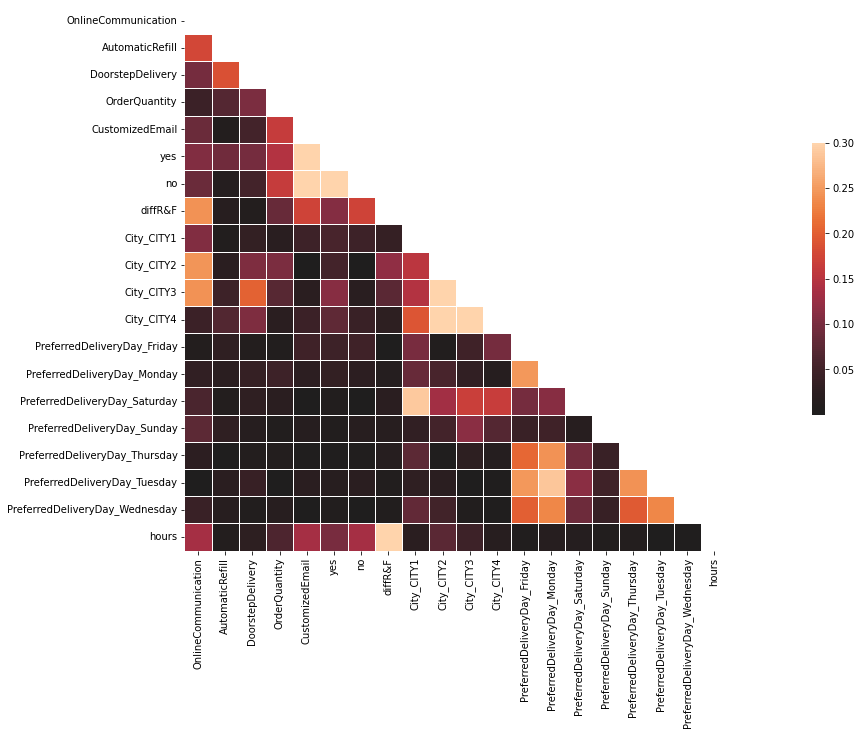

In [61]:
mask = np.triu(np.ones_like(corrr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr, mask=mask,vmax=.3, center=0,
            square=True, linewidths=.60, cbar_kws={"shrink": .5})
plt.show()

# Model Building

In [62]:
data4=data_encoded.drop('CustomerID',axis=1)

In [63]:
X = data4.drop(['target'], axis=1)
y = data4[['target']]

In [64]:
X

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,CustomizedEmail,yes,no,diffR&F,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,hours
0,0,0,0,-0.145350,1,1,1,-0.257101,0,0,1,0,1,0,0,0,0,0,0,-0.127902
1,1,0,0,-0.196239,0,0,0,-0.336492,0,1,0,0,1,0,0,0,0,0,0,-0.185665
2,1,0,0,-0.196239,0,0,0,-0.336492,0,0,0,1,0,0,0,0,0,0,1,-0.185691
3,0,0,0,-0.166271,1,1,1,1.187817,0,1,0,0,0,1,0,0,0,0,0,0.212786
4,1,0,0,-0.196379,0,0,0,-0.336492,0,0,1,0,0,0,0,0,0,1,0,-0.185669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,0,0,0,0.627703,1,0,1,-0.082440,0,1,0,0,0,0,0,0,0,1,0,1.166226
23816,1,0,0,-0.196169,0,0,0,-0.336492,0,0,0,1,1,0,0,0,0,0,0,-0.185683
23817,1,0,0,-0.196239,0,0,0,-0.336492,0,1,0,0,0,0,0,0,0,1,0,-0.185691
23818,0,0,0,-0.196099,0,0,0,-0.336492,0,0,0,1,1,0,0,0,0,0,0,-0.185644


In [65]:
y

,target
0,Low
1,Low
2,High
3,Low
4,Low
...,...
23815,Low
23816,High
23817,High
23818,Low


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [67]:
X_train.shape

(19056, 20)

In [68]:
X_test.shape

(4764, 20)

In [69]:
clf = DecisionTreeClassifier(max_depth=7)

In [70]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8824517212426533


In [73]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[ 367  408    7]
 [  48 3750    1]
 [  20   76   87]]


# GridSearchcv

In [74]:
# Define the parameter grid to search
param_grid = {'max_depth': [2, 3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best accuracy: 0.8858100467443473


# Working on Test data

# Importing the test data and merging

In [75]:
customer_data=pd.read_excel('/content/drive/MyDrive/DataForPHD/TestData/Customerdata_Test.xlsx')
customer_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday
...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday
5951,C28951,CITY3,2018-01-17,1,0,0,Friday
5952,C38741,CITY3,2018-01-17,1,0,0,Monday
5953,C20407,CITY2,2018-01-17,1,0,0,Friday


In [76]:
email_data=pd.read_excel('/content/drive/MyDrive/DataForPHD/TestData/Emaildata_Test.xlsx')
email_data.columns=['CustomerID','Dateofemail','EmailType','timestamp_of_sent','MailOpened','MailClicked']
email_data

,CustomerID,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable
...,...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no


In [77]:
email_data.duplicated().sum()

0

In [78]:
merge1=pd.merge(customer_data,email_data,how='inner')
merge1.shape

(129074, 12)

In [79]:
transaction_data=pd.read_excel('/content/drive/MyDrive/DataForPHD/TestData/transactionsdata_Test.xlsx')
transaction_data.columns=['CustomerID','DateofOrder','timestamp_of_opening','OrderQuantity']
transaction_data

,CustomerID,DateofOrder,timestamp_of_opening,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179
...,...,...,...,...
26763,C32947,2018-01-17,21:35:26,41
26764,C28951,2018-01-17,17:05:50,40
26765,C38741,2018-01-17,18:56:16,36
26766,C20407,2018-01-17,10:24:52,75


In [80]:
data=pd.merge(merge1,transaction_data,how='inner')
data.shape

(1013740, 15)

In [81]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2011-03-28,17:41:08,55
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2010-10-12,15:58:02,174
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2010-11-27,20:13:48,171
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2011-12-09,14:34:44,166
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2011-03-04,18:20:18,179


# test preprocessing

In [82]:
registered_dates=customer_data[['CustomerID','DateOfRegistration']]
pd.DataFrame(registered_dates)
registered_dates

,CustomerID,DateOfRegistration
0,C17838,2010-10-22
1,C12403,2008-11-17
2,C19041,2011-01-24
3,C24069,2010-09-18
4,C26718,2010-10-02
...,...,...
5950,C32947,2018-01-17
5951,C28951,2018-01-17
5952,C38741,2018-01-17
5953,C20407,2018-01-17


In [83]:
data['DateofOrder'] = pd.to_datetime(data['DateofOrder'])

In [84]:
first_order_dates = data.groupby('CustomerID')['DateofOrder'].min()
pd.DataFrame(first_order_dates)
first_order_dates = first_order_dates.reset_index()
first_order_dates = first_order_dates.rename(columns={'index': 'CustomerID'})
first_order_dates

,CustomerID,DateofOrder
0,C12121,2017-12-14
1,C12132,2013-10-20
2,C12134,2013-09-18
3,C12135,2018-01-10
4,C12136,2013-10-19
...,...,...
5950,C42153,2012-10-18
5951,C42155,2013-09-14
5952,C42157,2013-09-30
5953,C42167,2016-10-28


In [85]:
diff=pd.merge(registered_dates,first_order_dates,how='inner')
diff

,CustomerID,DateOfRegistration,DateofOrder
0,C17838,2010-10-22,2011-03-28
1,C12403,2008-11-17,2010-10-12
2,C19041,2011-01-24,2011-05-16
3,C24069,2010-09-18,2010-11-09
4,C26718,2010-10-02,2011-01-25
...,...,...,...
5950,C32947,2018-01-17,2018-01-17
5951,C28951,2018-01-17,2018-01-17
5952,C38741,2018-01-17,2018-01-17
5953,C20407,2018-01-17,2018-01-17


In [86]:
diff['diffR&F']=(diff['DateofOrder']- diff['DateOfRegistration']).dt.days
diff

,CustomerID,DateOfRegistration,DateofOrder,diffR&F
0,C17838,2010-10-22,2011-03-28,157
1,C12403,2008-11-17,2010-10-12,694
2,C19041,2011-01-24,2011-05-16,112
3,C24069,2010-09-18,2010-11-09,52
4,C26718,2010-10-02,2011-01-25,115
...,...,...,...,...
5950,C32947,2018-01-17,2018-01-17,0
5951,C28951,2018-01-17,2018-01-17,0
5952,C38741,2018-01-17,2018-01-17,0
5953,C20407,2018-01-17,2018-01-17,0


In [87]:
data.duplicated().sum()

0

In [88]:
data.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
Dateofemail             0
EmailType               0
timestamp_of_sent       0
MailOpened              0
MailClicked             0
DateofOrder             0
timestamp_of_opening    0
OrderQuantity           0
dtype: int64

In [89]:
data['datetime_str1'] = data['Dateofemail'] + ' ' + data['timestamp_of_sent']

In [90]:
# convert the concatenated string to a datetime object
data['datetimeofsent'] = pd.to_datetime(data['datetime_str1'], format='%Y-%m-%d %H:%M:%S')
data1=data.drop(['Dateofemail','timestamp_of_sent','datetime_str1'],axis=1)

data1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,datetimeofsent
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable,2011-03-28,17:41:08,55,2010-10-22 16:59:02
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2010-10-12,15:58:02,174,2008-11-17 12:46:56
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2010-11-27,20:13:48,171,2008-11-17 12:46:56
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2011-12-09,14:34:44,166,2008-11-17 12:46:56
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2011-03-04,18:20:18,179,2008-11-17 12:46:56


In [91]:
data1['DateofOrder']=data1['DateofOrder'].astype('str')

In [92]:
data1['datetime_str2'] = data1['DateofOrder'] + ' ' + data1['timestamp_of_opening']

In [93]:
# convert the concatenated string to a datetime object
data1['datetimeoforder'] = pd.to_datetime(data1['datetime_str2'], format='%Y-%m-%d %H:%M:%S')
data2=data1.drop(['DateofOrder','timestamp_of_opening','datetime_str2'],axis=1)

data2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,datetimeofsent,datetimeoforder
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable,55,2010-10-22 16:59:02,2011-03-28 17:41:08
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,174,2008-11-17 12:46:56,2010-10-12 15:58:02
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,171,2008-11-17 12:46:56,2010-11-27 20:13:48
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,166,2008-11-17 12:46:56,2011-12-09 14:34:44
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,179,2008-11-17 12:46:56,2011-03-04 18:20:18


In [94]:
data2['time_diff'] = pd.to_timedelta(pd.to_datetime(data2['datetimeoforder']) - data2['datetimeofsent']).astype('timedelta64[h]')

In [95]:
data3=data2.drop(['datetimeofsent','datetimeoforder'],axis=1)

In [96]:
data3

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,time_diff
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable,55,3768.0
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,174,16659.0
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,171,17767.0
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,166,26809.0
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,179,20093.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1013735,C32947,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,41,8.0
1013736,C28951,CITY3,2018-01-17,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,40,1.0
1013737,C38741,CITY3,2018-01-17,1,0,0,Monday,WelcomeEmail,yes,NotApplicable,36,7.0
1013738,C20407,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,75,-1.0


In [97]:
aggregated_data = data3.groupby(['CustomerID','City','DateOfRegistration','OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay']).agg({'EmailType': lambda x: ', '.join(x),'MailOpened': lambda x: ', '.join(x),
                                                                                                                                                                   'MailClicked': lambda x: ', '.join(x),
                                                                                                                                                                   'time_diff': 'sum','OrderQuantity':'sum'}).reset_index()

In [98]:
aggregated_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,time_diff,OrderQuantity
0,C12121,CITY1,2017-12-04,1,0,0,Friday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, yes, no, no, no, no, yes, no, no, yes, ye...","NotApplicable, no, no, no, no, no, yes, no, no...",2618.0,1300
1,C12132,CITY3,2013-10-20,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,3.0,40
2,C12134,CITY3,2013-09-18,1,0,0,Monday,WelcomeEmail,yes,NotApplicable,-3.0,40
3,C12135,CITY3,2017-11-01,1,0,1,Wednesday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, yes, no, yes, no, yes, no, no, no, no...","NotApplicable, no, yes, no, yes, no, yes, no, ...",27362.0,1230
4,C12136,CITY2,2013-09-28,1,0,0,Thursday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, yes, no, no, no, no, no, yes, no, no,...","NotApplicable, no, no, no, no, no, no, no, yes...",9738.0,3318
...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C42153,CITY1,2012-08-28,1,0,0,Sunday,"WelcomeEmail, WelcomeEmail, WelcomeEmail, Welc...","yes, yes, yes, yes, yes, no, no, no, no, no, n...","NotApplicable, NotApplicable, NotApplicable, N...",41481.0,4169
5951,C42155,CITY4,2013-09-14,1,0,0,Thursday,WelcomeEmail,yes,NotApplicable,-2.0,41
5952,C42157,CITY4,2013-09-30,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,4.0,41
5953,C42167,CITY2,2016-10-28,0,0,0,Monday,"WelcomeEmail, WelcomeEmail, WelcomeEmail, Welc...","yes, yes, yes, yes, yes, yes, no, no, no, no, ...","NotApplicable, NotApplicable, NotApplicable, N...",8029.0,25100


In [99]:
EmailType = set()
MailOpened = set()
MailClicked = set()

for row in aggregated_data.itertuples():
    EmailType.update(row.EmailType.split(', '))
    MailOpened.update(row.MailOpened.split(', '))
    MailClicked.update(row.MailClicked.split(', '))
    
# Create new columns for each email, timestamp, and date
for email in EmailType:
    aggregated_data[email] = aggregated_data['EmailType'].str.contains(email).astype(int)
for open in MailOpened:
    aggregated_data[open] = aggregated_data['MailOpened'].str.contains(open).astype(int)
for click in MailClicked:
    aggregated_data[click] = aggregated_data['MailClicked'].str.contains(click).astype(int)

# Drop the original columns containing the lists
aggregated_data = aggregated_data.drop(['EmailType','MailOpened','MailClicked'], axis=1)

In [100]:
aggregated_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,NotApplicable
0,C12121,CITY1,2017-12-04,1,0,0,Friday,2618.0,1300,1,1,1,1,1
1,C12132,CITY3,2013-10-20,1,0,0,Tuesday,3.0,40,0,1,0,0,1
2,C12134,CITY3,2013-09-18,1,0,0,Monday,-3.0,40,0,1,0,0,1
3,C12135,CITY3,2017-11-01,1,0,1,Wednesday,27362.0,1230,1,1,1,1,1
4,C12136,CITY2,2013-09-28,1,0,0,Thursday,9738.0,3318,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C42153,CITY1,2012-08-28,1,0,0,Sunday,41481.0,4169,1,1,1,1,1
5951,C42155,CITY4,2013-09-14,1,0,0,Thursday,-2.0,41,0,1,0,0,1
5952,C42157,CITY4,2013-09-30,1,0,0,Tuesday,4.0,41,0,1,0,0,1
5953,C42167,CITY2,2016-10-28,0,0,0,Monday,8029.0,25100,1,1,1,1,1


In [101]:
aggregated_data=pd.merge(aggregated_data,diff,how='inner')
data3=aggregated_data.drop(['DateOfRegistration','DateOfRegistration','DateofOrder'],axis=1)
data3.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,NotApplicable,diffR&F
0,C12121,CITY1,1,0,0,Friday,2618.0,1300,1,1,1,1,1,10
1,C12132,CITY3,1,0,0,Tuesday,3.0,40,0,1,0,0,1,0
2,C12134,CITY3,1,0,0,Monday,-3.0,40,0,1,0,0,1,0
3,C12135,CITY3,1,0,1,Wednesday,27362.0,1230,1,1,1,1,1,70
4,C12136,CITY2,1,0,0,Thursday,9738.0,3318,1,1,1,1,1,21


In [102]:
data3.nunique()

CustomerID              5955
City                       4
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
time_diff               3707
OrderQuantity           2612
CustomizedEmail            2
WelcomeEmail               1
yes                        2
no                         2
NotApplicable              1
diffR&F                  446
dtype: int64

In [103]:
# Select columns to encode
columns_to_encode = ['City','PreferredDeliveryDay']

# Perform one hot encoding
one_hot_encoded = pd.get_dummies(data3[columns_to_encode])

# Combine one hot encoded columns with original data
data_encoded = pd.concat([data3,one_hot_encoded], axis=1)

# Remove original categorical columns
data_encoded.drop(data3[columns_to_encode], axis=1, inplace=True)

# View the encoded data
data_encoded.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,CustomizedEmail,WelcomeEmail,yes,no,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C12121,1,0,0,2618.0,1300,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
1,C12132,1,0,0,3.0,40,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,C12134,1,0,0,-3.0,40,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,C12135,1,0,1,27362.0,1230,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,C12136,1,0,0,9738.0,3318,1,1,1,1,...,1,0,0,0,0,0,0,1,0,0


In [104]:
data_encoded.columns

Index(['CustomerID', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'time_diff', 'OrderQuantity', 'CustomizedEmail',
       'WelcomeEmail', 'yes', 'no', 'NotApplicable', 'diffR&F', 'City_CITY1',
       'City_CITY2', 'City_CITY3', 'City_CITY4', 'PreferredDeliveryDay_Friday',
       'PreferredDeliveryDay_Monday', 'PreferredDeliveryDay_Saturday',
       'PreferredDeliveryDay_Sunday', 'PreferredDeliveryDay_Thursday',
       'PreferredDeliveryDay_Tuesday', 'PreferredDeliveryDay_Wednesday'],
      dtype='object')

In [105]:
data_encoded=data_encoded.drop(['WelcomeEmail','NotApplicable'],axis=1)

In [106]:
scaler=StandardScaler()
data_encoded[['OrderQuantity','diffR&F','time_diff']]=scaler.fit_transform(data_encoded[['OrderQuantity','diffR&F','time_diff']])

In [107]:
data_encoded.columns=['CustomerID','OnlineCommunication','AutomaticRefill','DoorstepDelivery','hours','OrderQuantity','CustomizedEmail','no','yes','diffR&F','City_CITY1','City_CITY2','City_CITY3','City_CITY4','PreferredDeliveryDay_Friday',
                      'PreferredDeliveryDay_Monday','PreferredDeliveryDay_Saturday','PreferredDeliveryDay_Sunday',
                      'PreferredDeliveryDay_Thursday','PreferredDeliveryDay_Tuesday','PreferredDeliveryDay_Wednesday']

In [124]:
new=['CustomerID','OnlineCommunication','AutomaticRefill','DoorstepDelivery','OrderQuantity','CustomizedEmail','yes','no','diffR&F','City_CITY1','City_CITY2','City_CITY3','City_CITY4','PreferredDeliveryDay_Friday',
     'PreferredDeliveryDay_Monday','PreferredDeliveryDay_Saturday','PreferredDeliveryDay_Sunday','PreferredDeliveryDay_Thursday','PreferredDeliveryDay_Tuesday','PreferredDeliveryDay_Wednesday','hours']

In [125]:
test_data = data_encoded.reindex(columns=new)
test_data.head()


,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,CustomizedEmail,yes,no,diffR&F,City_CITY1,...,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,hours
0,C12121,1,0,0,-0.168334,1,1,1,-0.247237,1,...,0,0,1,0,0,0,0,0,0,-0.098334
1,C12132,1,0,0,-0.183479,0,0,0,-0.324775,0,...,1,0,0,0,0,0,0,1,0,-0.099423
2,C12134,1,0,0,-0.183479,0,0,0,-0.324775,0,...,1,0,0,1,0,0,0,0,0,-0.099425
3,C12135,1,0,1,-0.169176,1,1,1,0.217985,0,...,1,0,0,0,0,0,0,0,1,-0.088028
4,C12136,1,0,0,-0.144079,1,1,1,-0.161947,0,...,0,0,0,0,0,0,1,0,0,-0.095368


In [121]:
X.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity,CustomizedEmail,yes,no,diffR&F,City_CITY1,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,hours
0,0,0,0,-0.145350,1,1,1,-0.257101,0,0,1,0,1,0,0,0,0,0,0,-0.127902
1,1,0,0,-0.196239,0,0,0,-0.336492,0,1,0,0,1,0,0,0,0,0,0,-0.185665
2,1,0,0,-0.196239,0,0,0,-0.336492,0,0,0,1,0,0,0,0,0,0,1,-0.185691
3,0,0,0,-0.166271,1,1,1,1.187817,0,1,0,0,0,1,0,0,0,0,0,0.212786
4,1,0,0,-0.196379,0,0,0,-0.336492,0,0,1,0,0,0,0,0,0,1,0,-0.185669



# Model fitting on unseen data

In [127]:
df=test_data.drop('CustomerID',axis=1)

In [128]:
clf = DecisionTreeClassifier(max_depth=7)

In [129]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [130]:
test_pred = clf.predict(df)

In [131]:
test_pred = clf.predict(df)

In [133]:
pd.DataFrame(test_pred)

,0
0,Low
1,Medium
2,Medium
3,Low
4,Low
...,...
5950,Low
5951,Medium
5952,Medium
5953,Low
